<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Modulo_3/Aula_3_mudanca_de_tendencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparando o conteúdo anterior:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from fbprophet import Prophet

In [2]:
## df_esp = estado de são paulo
## df_sp = cidade de são paulo

df_esp = pd.read_csv("https://github.com/RPGraciotti/BootCampAlura/blob/main/Data/dados_covid_sp.zip?raw=true", compression = "zip", sep = ";")

df_esp.loc[:,"datahora"] = pd.to_datetime(df_esp.loc[:,"datahora"], format = "%Y-%m-%d")

df_sp = df_esp.query("nome_munic == 'São Paulo'")

mpl.rcParams["font.size"] = 18

In [3]:
df2 = pd.DataFrame()
df2.loc[:,"ds"] = df_sp.loc[:,"datahora"][:400]
df2.loc[:,"y"] = df_sp.loc[:,"casos_novos"][:400]

m2 = Prophet()
m2.fit(df2)

df_futuro2 = m2.make_future_dataframe(periods = 43) # 43 dias não analisados
previsao2 = m2.predict(df_futuro2)

df2_teste = pd.DataFrame()
df2_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][400:]
df2_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


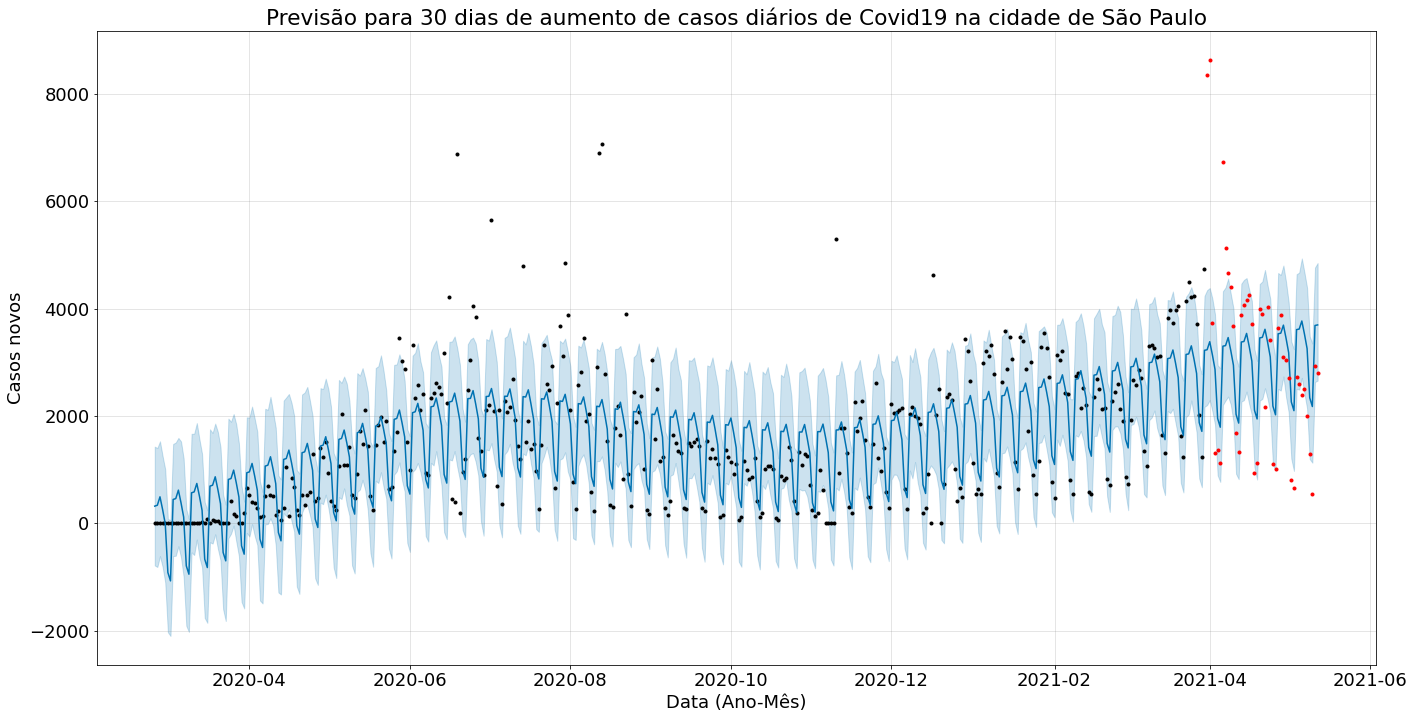

In [4]:
m2.plot(previsao2, xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10));
plt.plot(df2_teste.loc[:,"ds"], df2_teste.loc[:,"y"], ".r") # estudar o que é .r
plt.title("Previsão para 30 dias de aumento de casos diários de Covid19 na cidade de São Paulo")
plt.show()

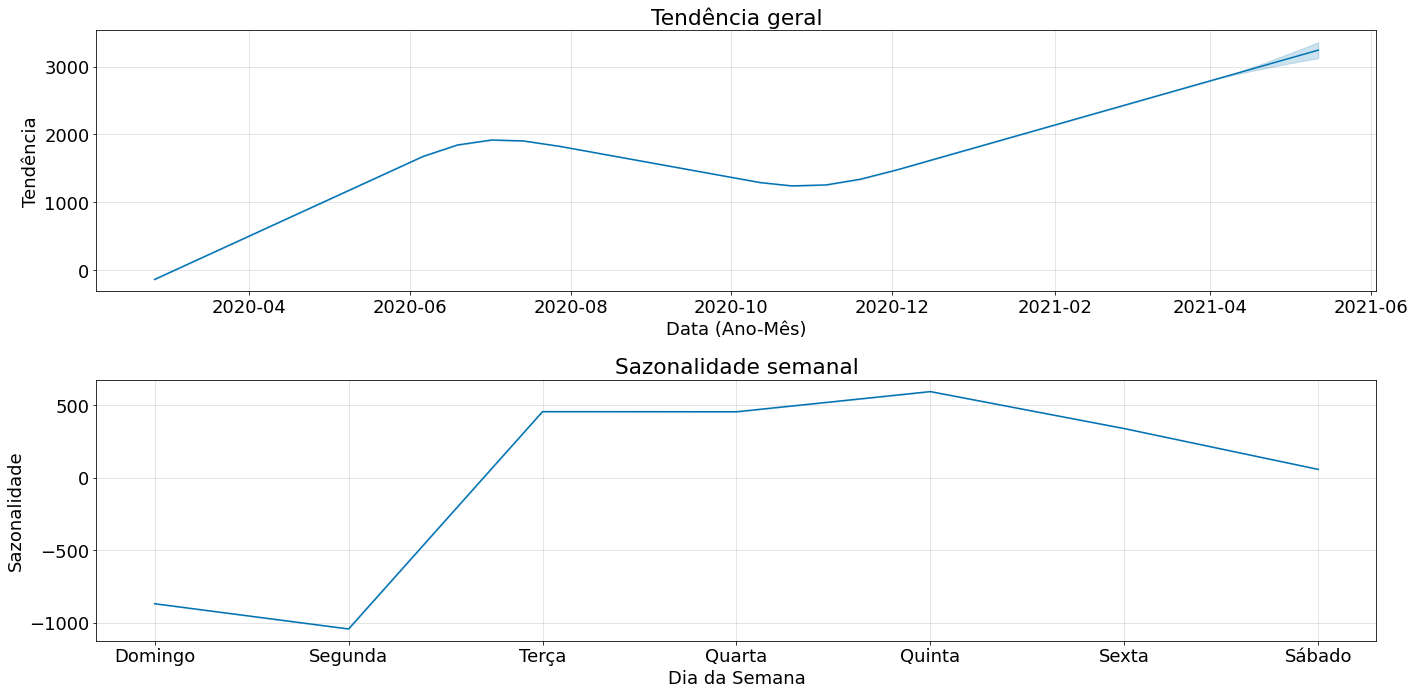

In [5]:
fig = m2.plot_components(previsao2, figsize = (20,10))
ax = fig.get_axes()
ax[0].set_title("Tendência geral")
ax[0].set_ylabel("Tendência")
ax[0].set_xlabel("Data (Ano-Mês)")
ax[1].set_title("Sazonalidade semanal")
ax[1].set_ylabel("Sazonalidade")
ax[1].set_xticks(range(0,7))
ax[1].set_xticklabels(["Domingo", "Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado"])
ax[1].set_xlabel("Dia da Semana")
fig.tight_layout()
plt.show()

# Seguindo com a aula

In [6]:
from fbprophet.plot import add_changepoints_to_plot

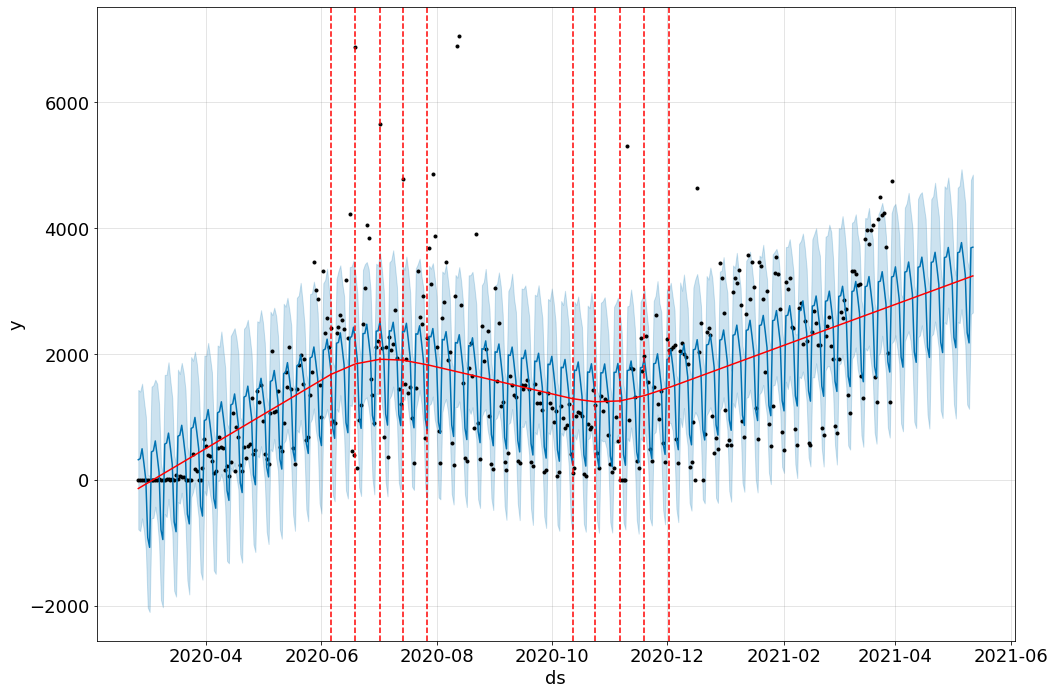

In [7]:
fig = m2.plot(previsao2, figsize = (15,10))
a = add_changepoints_to_plot(fig.gca(), m2, previsao2)

Adicionando mais change points:

In [8]:
m3 = Prophet(n_changepoints = 50)
m3.fit(df2)

df_futuro3 = m3.make_future_dataframe(periods = 43) # 43 dias não analisados
previsao3 = m3.predict(df_futuro3)

# df3_teste = pd.DataFrame()
# df3_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][400:]
# df3_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


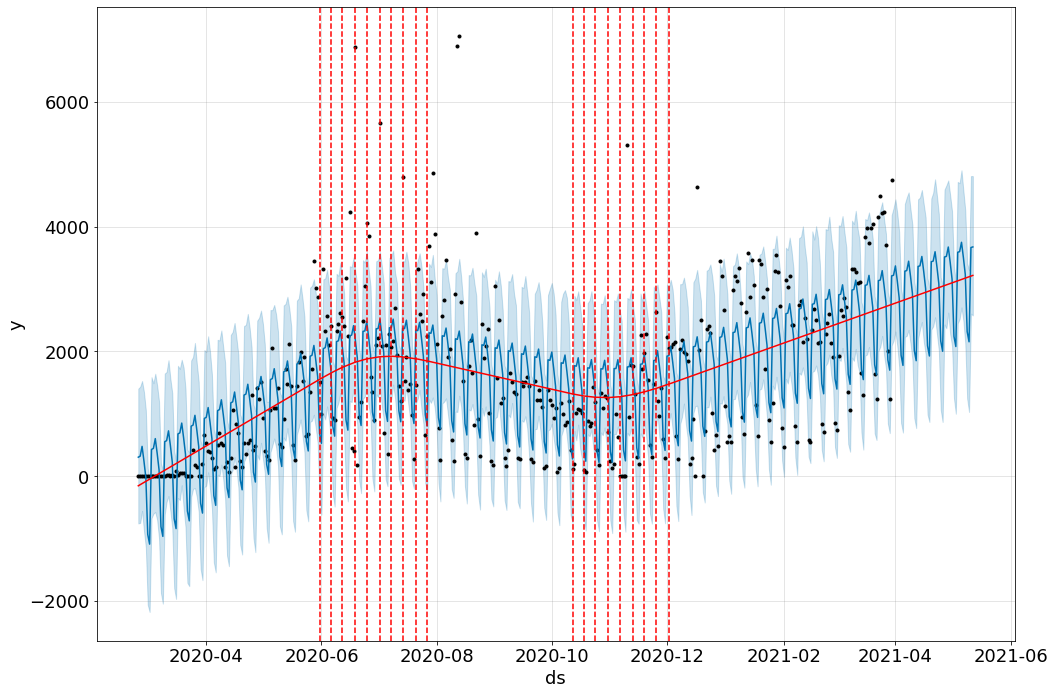

In [9]:
fig = m3.plot(previsao3, figsize = (15,10))
a = add_changepoints_to_plot(fig.gca(), m3, previsao3)

Prior scale

In [10]:
m4 = Prophet(n_changepoints = 25, changepoint_prior_scale = 0.0005)
m4.fit(df2)

df_futuro4 = m4.make_future_dataframe(periods = 43) # 43 dias não analisados
previsao4 = m4.predict(df_futuro4)

# df3_teste = pd.DataFrame()
# df3_teste.loc[:,"ds"] = df_sp.loc[:,"datahora"][400:]
# df3_teste.loc[:,"y"] = df_sp.loc[:,"casos_novos"][400:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


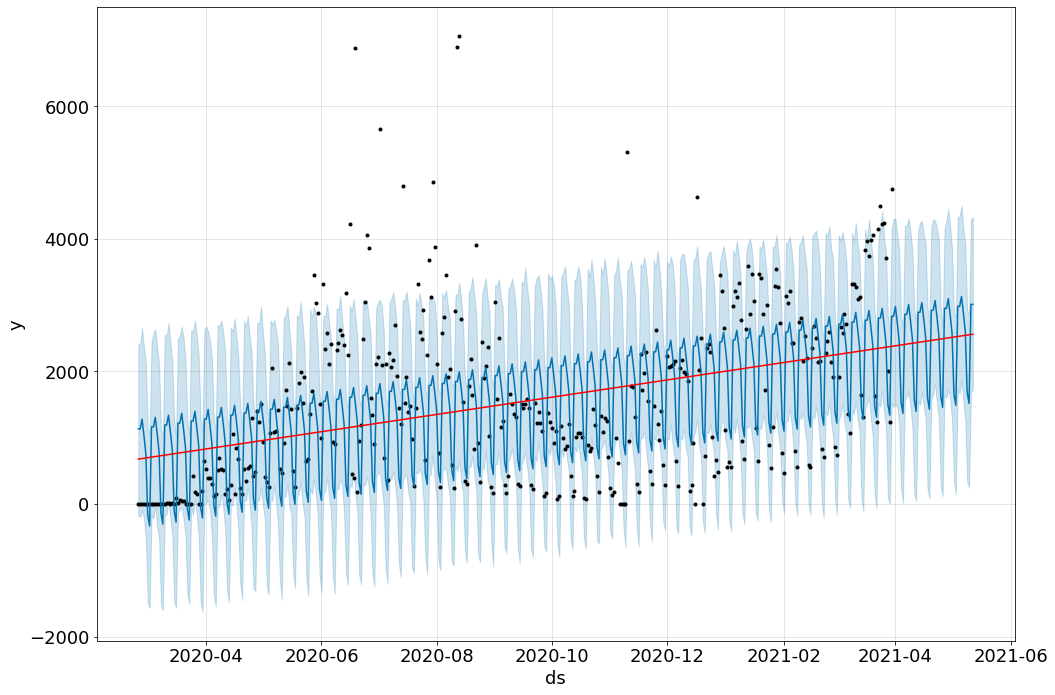

In [11]:
fig = m4.plot(previsao4, figsize = (15,10))
a = add_changepoints_to_plot(fig.gca(), m4, previsao4)

In [12]:
m5 = Prophet(changepoints = ["2020-12-31"])
m5.fit(df2)

df_futuro5 = m5.make_future_dataframe(periods = 43) # 43 dias não analisados
previsao5 = m5.predict(df_futuro5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


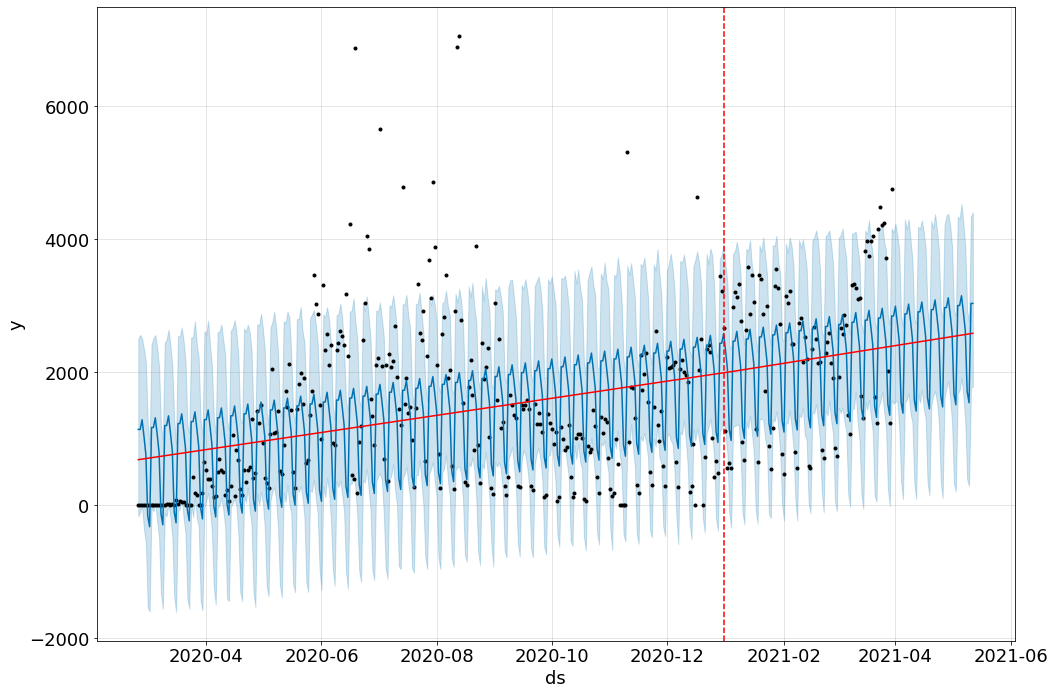

In [13]:
fig = m5.plot(previsao5, figsize = (15,10))
a = add_changepoints_to_plot(fig.gca(), m5, previsao5)

## Desafio 02 - Desenvolver uma função que roda o modelo automaticamente:

Perceba que eu fiz a função primeiro para permitir a aplicação dela no desafio 1

In [14]:
def run_model(df, 
              periods,
              changepoints = None,
              n_changepoints = 25, 
              changepoint_prior_scale = 0.05, 
              changepoint_range = 0.8):
  
  mx = Prophet(changepoints = changepoints, 
               n_changepoints = n_changepoints,
               changepoint_prior_scale = changepoint_prior_scale,
               changepoint_range = changepoint_range) # chama o objeto de modelo
  mx.fit(df) # associa o modelo ao dataframe de treino

  df_prev = mx.make_future_dataframe(periods = periods) # cria o dataframe de previsão que vai ser gerado mas não utilizado fora
  prev = mx.predict(df_prev) # faz a previsao baseada no modelo ajustado e no dataframe de previsao

  return mx, prev # retorna o modelo como elemento [0], e a previsao como elemento [1]

### Para a função rodar na forma mais básica, precisamos apenas passar o dataframe de treino, já formatado como o prophet
### usa, e o periods que vamos estimar os dados.

### Como há uma série de parâmetros da função Prophet, você pode adicioná-los na definição da função.
### Para a aula, vamos brincar com os parâmetros de changepoints, os quais eu deixei com o default da função.

In [15]:
m3 = run_model(df2, periods = 30, n_changepoints = 25, 
               changepoint_prior_scale = 1, changepoint_range = 1,
               changepoints = ["2020-12-31"])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


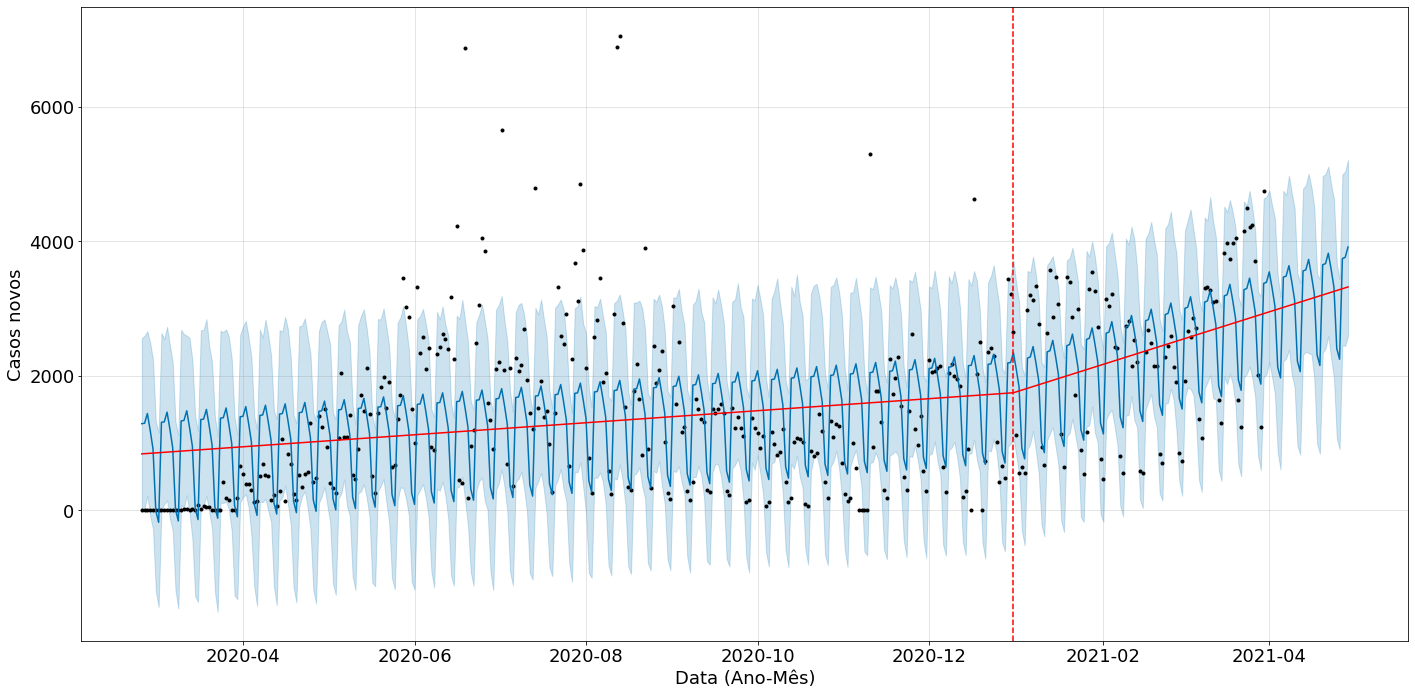

In [16]:
fig = m3[0].plot(m3[1], xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10));
add_changepoints_to_plot(fig.gca(), m3[0], m3[1])
plt.show()

Parece que a função ~ ~ funciona ~ ~! Agora pode seguir para o 

## Desafio 01 - Identificar potenciais changepoints:

In [17]:
m3 = run_model(df2, periods = 30, n_changepoints = 25, 
               changepoint_prior_scale = 1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


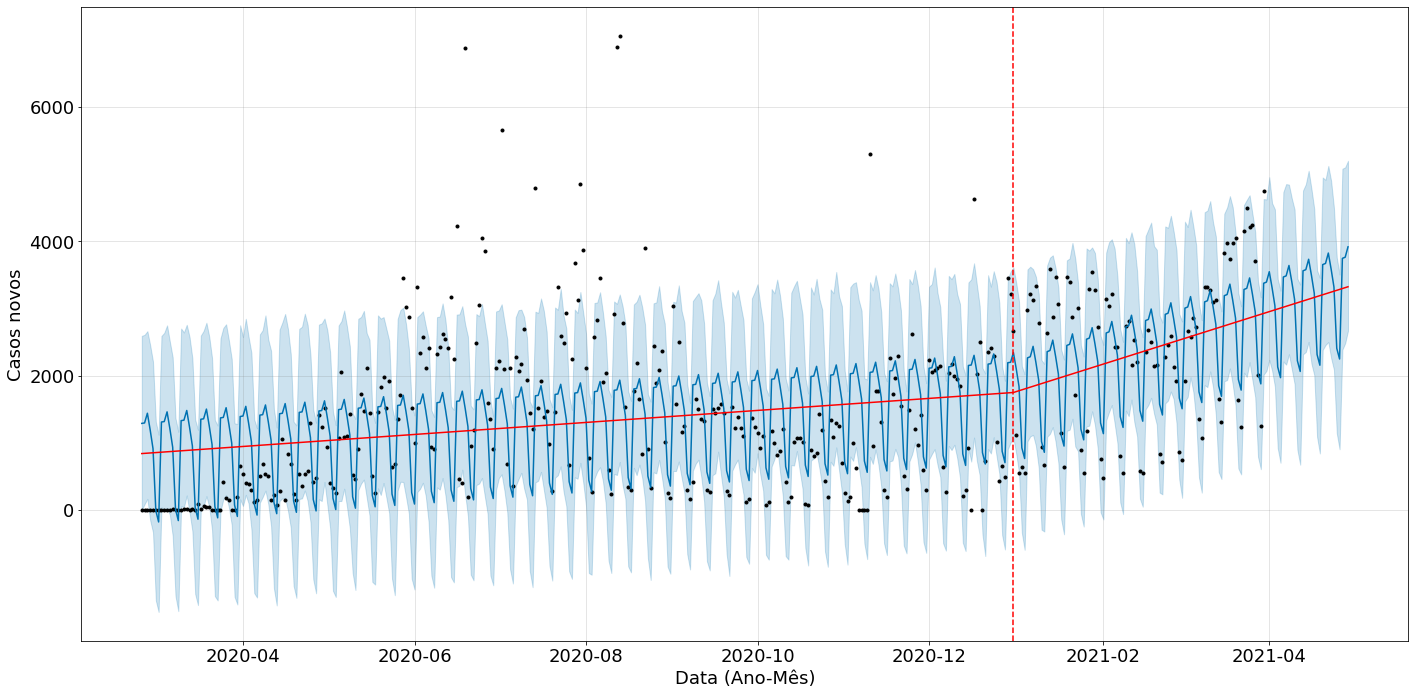

In [18]:

fig = m3[0].plot(m3[1], xlabel = "Data (Ano-Mês)", ylabel = "Casos novos", figsize = (20,10));
add_changepoints_to_plot(fig.gca(), m3[0], m3[1])
plt.show()